# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).



In [3]:
# Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through cities in list
for c, city in enumerate(cities):
        
    # Group cities in sets of 50
    if (c % 50 == 0 and c >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL for city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run API request for each city
    try:
        # Parse JSON & retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # skip not found errors
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | bellevue
Processing Record 11 of Set 1 | mpika
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | palmer
Processing Record 14 of Set 1 | buala
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | lolua
City not found. Skipping...
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | haines junction
Processing Record 22 of Set 1 |

City not found. Skipping...
Processing Record 41 of Set 4 | bosaso
Processing Record 42 of Set 4 | sembe
Processing Record 43 of Set 4 | talnakh
Processing Record 44 of Set 4 | sobolevo
Processing Record 45 of Set 4 | deputatskiy
Processing Record 46 of Set 4 | manati
Processing Record 47 of Set 4 | cooma
Processing Record 48 of Set 4 | aitape
Processing Record 49 of Set 4 | oschersleben
Processing Record 0 of Set 5 | krasnoye
Processing Record 1 of Set 5 | san julian
Processing Record 2 of Set 5 | westpunt
City not found. Skipping...
Processing Record 3 of Set 5 | padilla
Processing Record 4 of Set 5 | korgen
Processing Record 5 of Set 5 | leshukonskoye
Processing Record 6 of Set 5 | lensk
Processing Record 7 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 8 of Set 5 | zabol
Processing Record 9 of Set 5 | cairns
Processing Record 10 of Set 5 | puerto ayora
Processing Record 11 of Set 5 | zhangye
Processing Record 12 of Set 5 | mount isa
Processing Record 13 of Set 5 |

Processing Record 38 of Set 8 | erenhot
Processing Record 39 of Set 8 | grand-santi
Processing Record 40 of Set 8 | vao
Processing Record 41 of Set 8 | hervey bay
Processing Record 42 of Set 8 | bushenyi
Processing Record 43 of Set 8 | tramore
Processing Record 44 of Set 8 | raga
Processing Record 45 of Set 8 | paka
Processing Record 46 of Set 8 | viedma
Processing Record 47 of Set 8 | doctor juan manuel frutos
Processing Record 48 of Set 8 | laramie
Processing Record 49 of Set 8 | lethem
Processing Record 0 of Set 9 | kirakira
Processing Record 1 of Set 9 | chachapoyas
Processing Record 2 of Set 9 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 9 | cidreira
Processing Record 4 of Set 9 | ucluelet
Processing Record 5 of Set 9 | linfen
Processing Record 6 of Set 9 | valdosta
Processing Record 7 of Set 9 | lompoc
Processing Record 8 of Set 9 | cutervo
Processing Record 9 of Set 9 | port lincoln
Processing Record 10 of Set 9 | srivardhan
Processing Record 11 of Set 9 | m

Processing Record 26 of Set 12 | shipley
Processing Record 27 of Set 12 | samusu
City not found. Skipping...
Processing Record 28 of Set 12 | launceston
Processing Record 29 of Set 12 | stornoway
Processing Record 30 of Set 12 | tame
Processing Record 31 of Set 12 | bulgan
Processing Record 32 of Set 12 | hasaki
Processing Record 33 of Set 12 | liberal
Processing Record 34 of Set 12 | negombo
Processing Record 35 of Set 12 | qasigiannguit
Processing Record 36 of Set 12 | zhigansk
Processing Record 37 of Set 12 | fare
Processing Record 38 of Set 12 | eureka
Processing Record 39 of Set 12 | mola di bari
Processing Record 40 of Set 12 | sarab
Processing Record 41 of Set 12 | padang
Processing Record 42 of Set 12 | bambanglipuro
Processing Record 43 of Set 12 | basco
Processing Record 44 of Set 12 | mosetse
Processing Record 45 of Set 12 | buariki
City not found. Skipping...
Processing Record 46 of Set 12 | grand centre
City not found. Skipping...
Processing Record 47 of Set 12 | tomboucto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# display data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,55.40,54,40,16.11,CL,1610116747
1,sao filipe,14.8961,-24.4956,75.60,77,2,16.26,CV,1610116747
2,castro,-24.7911,-50.0119,75.04,81,39,4.72,BR,1610116747
3,qaanaaq,77.4840,-69.3632,-3.80,87,100,13.60,GL,1610116747
4,port alfred,-33.5906,26.8910,75.99,82,65,1.99,ZA,1610116565


In [11]:
# Export the city data into a .csv
city_data_df.to_csv('city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
humidity_max = city_data_df["Humidity"].max()
humidity_max

100

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_df[city_data_df.Humidity < 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,55.40,54,40,16.11,CL,1610116747
1,sao filipe,14.8961,-24.4956,75.60,77,2,16.26,CV,1610116747
2,castro,-24.7911,-50.0119,75.04,81,39,4.72,BR,1610116747
3,qaanaaq,77.4840,-69.3632,-3.80,87,100,13.60,GL,1610116747
4,port alfred,-33.5906,26.8910,75.99,82,65,1.99,ZA,1610116565
...,...,...,...,...,...,...,...,...,...
579,klaksvik,62.2266,-6.5890,39.20,93,75,17.27,FO,1610116788
580,sao felix do xingu,-6.6447,-51.9950,93.31,45,94,1.43,BR,1610116789
581,sakaraha,-22.9000,44.5333,84.16,52,50,13.24,MG,1610116789
582,ugoofaaru,5.6667,73.0000,83.25,73,100,3.06,MV,1610116789


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

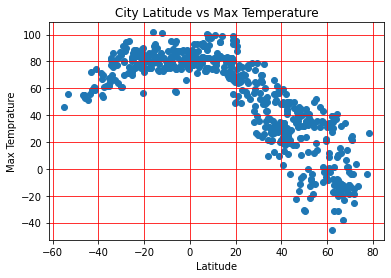

In [20]:
plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"] )
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temprature")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

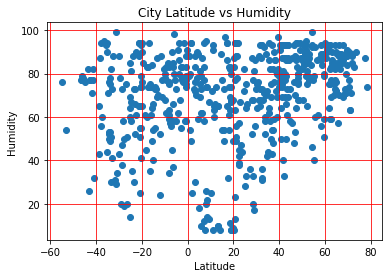

In [22]:
plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"] )
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

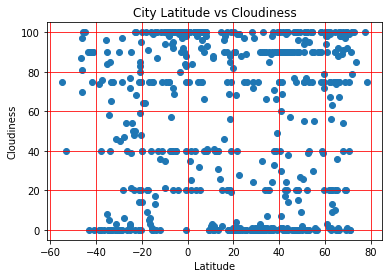

In [25]:
plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"] )
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

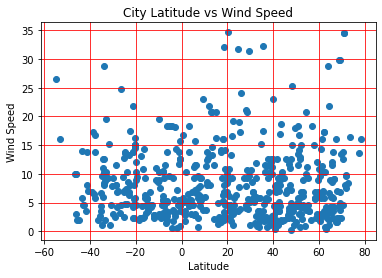

In [28]:
plt.figure(facecolor=(1, 1, 1))
fig = plt.figure()
fig.patch.set_facecolor
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"] )
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="red")

## Linear Regression

In [63]:
#North
northern_hem = clean_city_data.loc[clean_city_data['Lat'] > 0]

def max_temp(x_values,y_values):

    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [64]:
# South

southern_hem = clean_city_data.loc[clean_city_data['Lat'] < 0]

def max_temp(x_values,y_values):

    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    print(regress_values)
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1      73.701642
3     -16.164074
6      90.680931
9      26.729400
11     33.923350
         ...    
577    -4.293619
578    36.042925
579     5.742991
582    86.953511
583    27.344367
Name: Lat, Length: 385, dtype: float64
y = -1.44x +95.09
The r-value is: 0.744285900865422


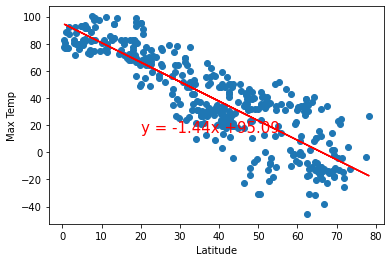

In [65]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hem["Lat"]
y_values = northern_hem["Max Temp"]
max_temp(x_values,y_values)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      63.055451
2      75.301327
4      71.501547
5      76.022808
7      66.197270
         ...    
566    75.038393
568    77.327027
569    83.070721
580    83.137264
581    76.117937
Name: Lat, Length: 183, dtype: float64
y = 0.43x +86.01
The r-value is: 0.30059279562138463


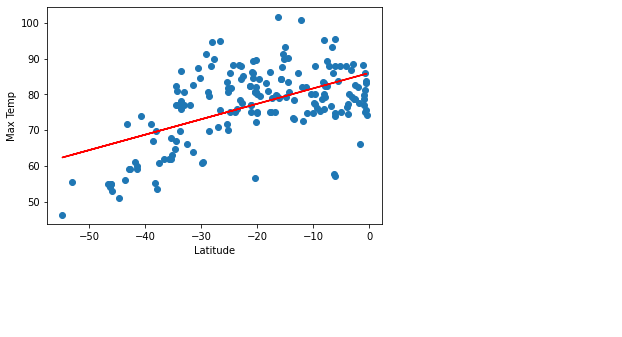

In [66]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Max Temp"]
max_temp(x_values,y_values)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      62.431515
3      87.454445
6      57.703666
9      75.510842
11     73.507701
         ...    
577    84.149140
578    72.917510
579    81.354466
582    58.741558
583    75.339606
Name: Lat, Length: 385, dtype: float64
y = 0.4x +56.48
The r-value is: 0.148583377206809


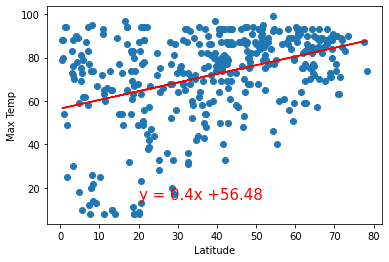

In [67]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Humidity"]
max_temp(x_values,y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      60.252180
2      66.653612
4      64.667308
5      67.030761
7      61.894541
         ...    
566    66.516166
568    67.712531
569    70.715000
580    70.749785
581    67.080489
Name: Lat, Length: 183, dtype: float64
y = 0.23x +72.25
The r-value is: 0.02524330780799046


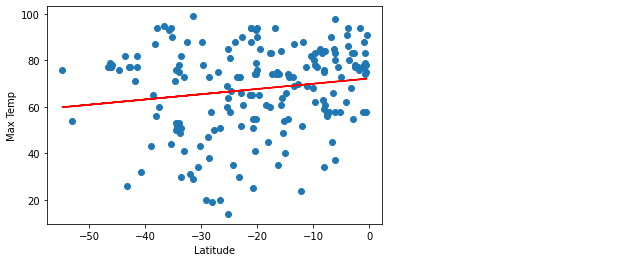

In [68]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Humidity"]
max_temp(x_values,y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      49.201470
3      59.026821
6      47.345062
9      54.337119
11     53.550578
         ...    
577    57.728980
578    53.318837
579    56.631641
582    47.752595
583    54.269883
Name: Lat, Length: 385, dtype: float64
y = 0.16x +46.86
The r-value is: 0.006102818010584247


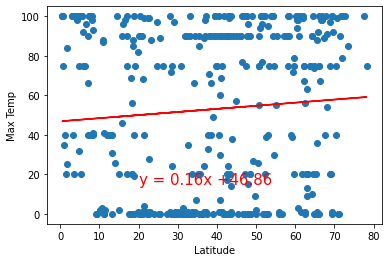

In [69]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Cloudiness"]
max_temp(x_values,y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      31.804266
2      53.019627
4      46.436700
5      54.269556
7      37.247309
         ...    
566    52.564107
568    56.529050
569    66.479709
580    66.594992
581    54.434363
Name: Lat, Length: 183, dtype: float64
y = 0.75x +71.57
The r-value is: 0.06823603157032776


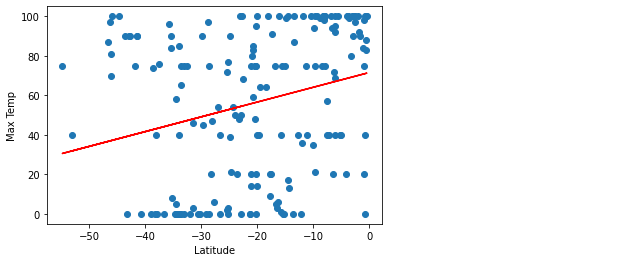

In [70]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Cloudiness"]
max_temp(x_values,y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      7.931822
3      8.087948
6      7.902324
9      8.013428
11     8.000930
         ...   
577    8.067326
578    7.997248
579    8.049889
582    7.908799
583    8.012360
Name: Lat, Length: 385, dtype: float64
y = 0.0x +7.89
The r-value is: 6.190323457133369e-05


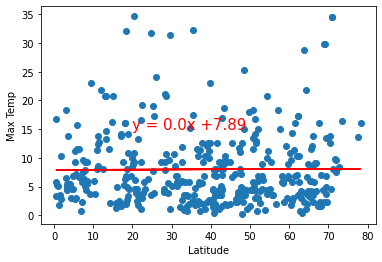

In [71]:
x_values = northern_hem["Lat"]
y_values = northern_hem["Wind Speed"]
max_temp(x_values,y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      9.824496
2      8.318731
4      8.785956
5      8.230017
7      9.438175
         ...   
566    8.351062
568    8.069649
569    7.363399
580    7.355216
581    8.218320
Name: Lat, Length: 183, dtype: float64
y = -0.05x +7.0
The r-value is: 0.016826560982828274


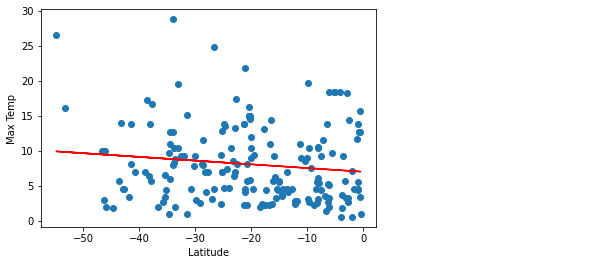

In [72]:
x_values = southern_hem["Lat"]
y_values = southern_hem["Wind Speed"]
max_temp(x_values,y_values)